In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
# Visualizations
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

product_reviews_df = pd.read_csv('textReviews.csv')

In [2]:
stop_words = stopwords.words("english")

In [2]:
# Concatenate the reviewText column with the summary column
product_reviews_df["Review"] = product_reviews_df['reviewText'] + product_reviews_df['summary']

In [3]:
product_reviews_df.head()

,reviewNumber,overall,vote,asin,reviewTime,reviewText,summary,Review
0,0,4,0.0,0321719816,2010-10-20,I've been using Dreamweaver (and it's predeces...,A solid overview of Dreamweaver CS5,I've been using Dreamweaver (and it's predeces...
1,1,4,0.0,0321719816,2010-10-18,"The demo is done with the PC version, with ref...",A good value,"The demo is done with the PC version, with ref..."
2,2,5,3.0,0321719816,2010-10-16,If you've been wanting to learn how to create ...,This is excellent software for those who want ...,If you've been wanting to learn how to create ...
3,3,5,0.0,0321719816,2010-10-12,I've been creating websites with Dreamweaver f...,A Fantastic Overview of Dream Weaver and Web D...,I've been creating websites with Dreamweaver f...
4,4,5,0.0,0321719816,2010-10-07,I decided (after trying a number of other prod...,Excellent Tutorials!,I decided (after trying a number of other prod...


In [21]:
x = 1598 + 719 + 1500
y = 5966 + 3015
z = x + y
y/z

0.7017502734802313

In [5]:
product_reviews_df['Review'][0]

"I've been using Dreamweaver (and it's predecessor Macromedia's UltraDev) for many years.  For someone who is an experienced web designer, this course is a high-level review of the CS5 version of Dreamweaver, but it doesn't go into a great enough level of detail to find it very useful.\n\nOn the other hand, this is a great tool for someone who is a relative novice at web design.  It starts off with a basic overview of HTML and continues through the concepts necessary to build a modern web site.  Someone who goes through this course should exit with enough knowledge to create something that does what you want it do do...within reason.  Don't expect to go off and build an entire e-commerce system with only this class under your belt.\n\nIt's important to note that there's a long gap from site design to actual implementation.  This course teaches you how to implement a design.  The user interface and overall user experience is a different subject that isn't covered here...it's possible to

In [4]:
def f(row):
    
    if row['overall'] == 3.0:
        val = 0
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = -1
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 1
    else:
        val = 0
    return val

In [5]:
product_reviews_df["sentiment"] = product_reviews_df.apply(f, axis=1)
product_reviews_df.head()

,reviewNumber,overall,vote,asin,reviewTime,reviewText,summary,Review,sentiment
0,0,4,0.0,0321719816,2010-10-20,I've been using Dreamweaver (and it's predeces...,A solid overview of Dreamweaver CS5,I've been using Dreamweaver (and it's predeces...,1
1,1,4,0.0,0321719816,2010-10-18,"The demo is done with the PC version, with ref...",A good value,"The demo is done with the PC version, with ref...",1
2,2,5,3.0,0321719816,2010-10-16,If you've been wanting to learn how to create ...,This is excellent software for those who want ...,If you've been wanting to learn how to create ...,1
3,3,5,0.0,0321719816,2010-10-12,I've been creating websites with Dreamweaver f...,A Fantastic Overview of Dream Weaver and Web D...,I've been creating websites with Dreamweaver f...,1
4,4,5,0.0,0321719816,2010-10-07,I decided (after trying a number of other prod...,Excellent Tutorials!,I decided (after trying a number of other prod...,1


In [6]:
product_reviews_df['sentiment'].value_counts()

 1    8981
-1    2219
 0    1598
Name: sentiment, dtype: int64

In [7]:
product_reviews_new_df = product_reviews_df.drop(['vote','reviewTime','reviewText','summary'], axis=1)
product_reviews_new_df

,reviewNumber,overall,asin,Review,sentiment
0,0,4,0321719816,I've been using Dreamweaver (and it's predeces...,1
1,1,4,0321719816,"The demo is done with the PC version, with ref...",1
2,2,5,0321719816,If you've been wanting to learn how to create ...,1
3,3,5,0321719816,I've been creating websites with Dreamweaver f...,1
4,4,5,0321719816,I decided (after trying a number of other prod...,1
...,...,...,...,...,...
12793,12800,4,B01FFVDY9M,When I ordered this it was listed as Photo Edi...,1
12794,12801,3,B01HAP3NUG,This software has SO much going on. Theres a ...,0
12795,12802,4,B01HAP3NUG,I have used both more complex and less complex...,1
12796,12803,3,B01HAP47PQ,Pinnacle Studio 20 Ultimate is a perfectly ser...,0


In [8]:
product_reviews_new_df.drop(product_reviews_new_df[(product_reviews_new_df['sentiment'] == 0)].index, inplace=True)

In [9]:
 contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
 }

In [10]:
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
        
    # 
    
        return text

In [11]:
product_reviews_new_df['Review']=product_reviews_new_df['Review'].apply(lambda x:clean_text(x))
product_reviews_new_df.head()

,reviewNumber,overall,asin,Review,sentiment
0,0,4,0321719816,using dreamweaver predecessor macromedia ultra...,1
1,1,4,0321719816,demo done pc version references mac version ne...,1
2,2,5,0321719816,wanting learn create website either lacked con...,1
3,3,5,0321719816,creating websites dreamweaver years experience...,1
4,4,5,0321719816,decided trying number products switch gold sta...,1


In [14]:
product_reviews_new_df['overall'].value_counts()

44828

Text(0, 0.5, 'Number of Reviews')

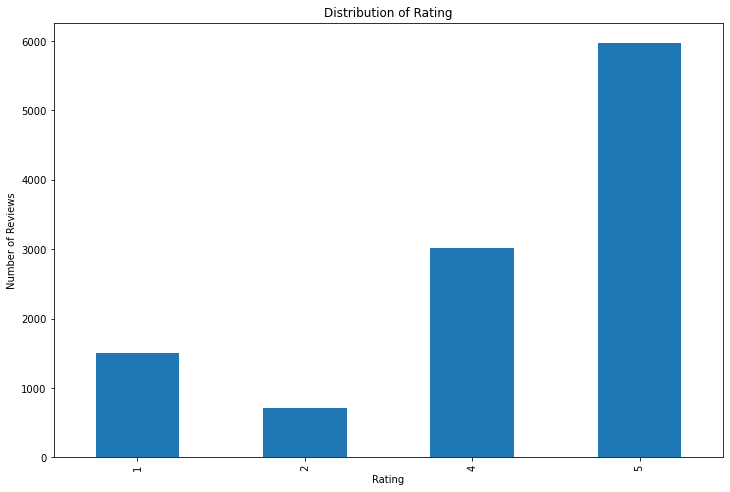

In [14]:
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
product_reviews_new_df['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

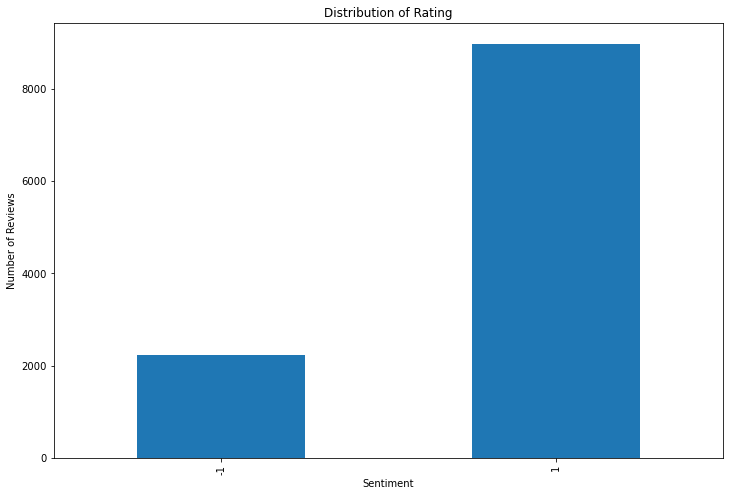

In [15]:
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
product_reviews_new_df['sentiment'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')

In [15]:
product_reviews_new_df["sentiment"].value_counts()

 1    8981
-1    2219
Name: sentiment, dtype: int64

In [16]:
asin = product_reviews_new_df.asin.unique()
asin

array(['0321719816', '0321700945', '0321719824', '0763855553',
       '0982697813', '1413313701', '1413313728', '1426296355',
       '1600775411', '1615354336', 'B00003IRBU', 'B00003JAU9',
       'B00003IRBV', 'B00003JAU7', 'B00004TYCR', 'B00004W62O',
       'B000050HEI', 'B000050ZRE', 'B00005AC56', 'B00005AFI2',
       'B00005AFI1', 'B00005AFI4', 'B00005LBVS', 'B00005LVWL',
       'B00005MOTH', 'B00005MOTG', 'B00005MOTE', 'B00005N6K4',
       'B00005MOTF', 'B00005NCJ3', 'B00005NZ5Z', 'B00005OA45',
       'B000066ST3', 'B000069IL2', 'B00006F7S2', 'B00006FI0N',
       'B00006FI0Z', 'B00006J3FM', 'B00006OAQU', 'B00006ULHT',
       'B0000AZJVC', 'B0000BX73E', 'B0000BZ54V', 'B0000C8XYO',
       'B0000C8XYI', 'B0000C8Y0W', 'B0000CEM5O', 'B0000E6NK9',
       'B0001F0XHE', 'B0001FS9NE', 'B0001WN16M', 'B0001XLSG6',
       'B00022PTI4', 'B00022PTRU', 'B00022PTT8', 'B00025O87E',
       'B0002D12D4', 'B0002G71T0', 'B0002UCSKI', 'B0002UCJV6',
       'B0002ZALES', 'B00062VOW0', 'B0006460RM', 'B0006

In [17]:
product_reviews_new_df['asin'].value_counts().idxmax()

'B0000AZJY6'

In [18]:
asin_total_reviews = product_reviews_new_df['asin'].value_counts()
asin_total_reviews

B0000AZJY6    450
B000EORV8Q    231
B000050ZRE    229
B0001FS9NE    229
B00EZPXYP4     91
             ... 
B00113N12E      1
B000WM1Z46      1
B000VYAL2C      1
B000VSDNMI      1
B0012KW3KM      1
Name: asin, Length: 796, dtype: int64

In [19]:
positive_reviews_df = product_reviews_new_df[product_reviews_new_df.sentiment != -1]
positive_reviews_df.head()

,reviewNumber,overall,asin,Review,sentiment
0,0,4,0321719816,using dreamweaver predecessor macromedia ultra...,1
1,1,4,0321719816,demo done pc version references mac version ne...,1
2,2,5,0321719816,wanting learn create website either lacked con...,1
3,3,5,0321719816,creating websites dreamweaver years experience...,1
4,4,5,0321719816,decided trying number products switch gold sta...,1


In [20]:
most_positive_total = positive_reviews_df['asin'].value_counts()
most_positive_total

B0000AZJY6    442
B000EORV8Q    227
B0001FS9NE    225
B000050ZRE    225
B00EZPXYP4     84
             ... 
B00006FI0Z      1
B000LP6JKY      1
B00005AC56      1
B00KQV8DJ8      1
B015MI2AYI      1
Name: asin, Length: 771, dtype: int64

In [21]:
negative_reviews_df = product_reviews_new_df[product_reviews_new_df.sentiment != 1]
negative_reviews_df.head()

,reviewNumber,overall,asin,Review,sentiment
21,21,1,0763855553,excel allow copy paste sometimes later found r...,-1
23,23,1,0763855553,using office twenty years still worth money bu...,-1
35,35,1,0763855553,complete rubbish got acer aspire laptop instal...,-1
39,39,1,0763855553,try install receive error code 30088 04 cannot...,-1
67,67,2,1413313701,could get grips software bad thought case woul...,-1


In [22]:
most_negative_total = negative_reviews_df['asin'].value_counts()
most_negative_total

B008H3SW4I    34
B0013O54P8    22
B00NG7JVSQ    22
B00EDSI7QO    19
B000X86ZAS    18
              ..
B00EZKNY8G     1
B00F2BA8U4     1
B00F2BDP9K     1
B00FB5R4L2     1
B01E6C5D1S     1
Name: asin, Length: 610, dtype: int64

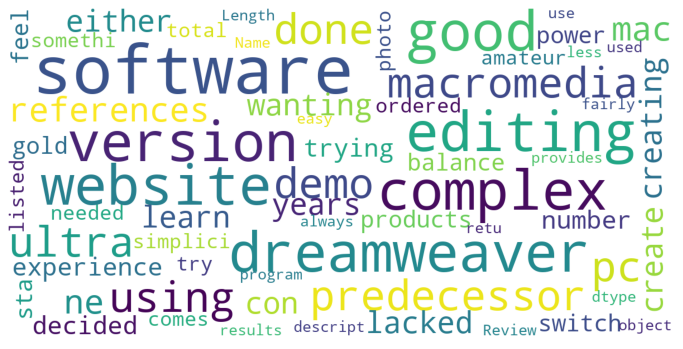



Word Cloud processing completed in 
CPU times: user 230 ms, sys: 16 ms, total: 246 ms
Wall time: 259 ms


In [23]:
%%time
#--- WordCloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
  wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=200, max_font_size=40, scale=3, random_state=1).generate(str(data)) # chosen at random by flipping a coin; it was heads
  fig = plt.figure(1, figsize=(12, 10))
  plt.axis('off')
  if title: 
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
  plt.imshow(wordcloud)
  plt.show()

show_wordcloud(positive_reviews_df['Review'])
print()
print()
print("Word Cloud processing completed in ")

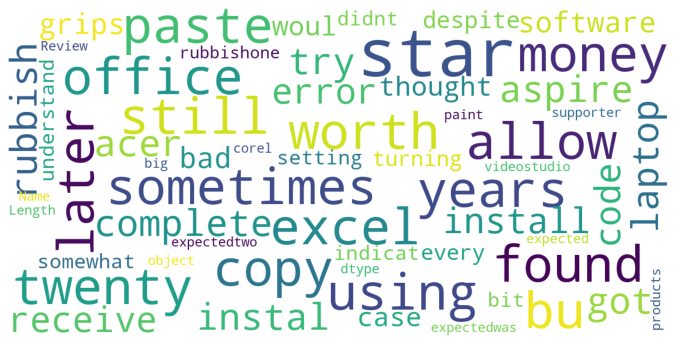



Word Cloud processing completed in 
CPU times: user 229 ms, sys: 10.3 ms, total: 239 ms
Wall time: 237 ms


In [24]:
%%time
#--- WordCloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
  wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=200, max_font_size=40, scale=3, random_state=1).generate(str(data)) # chosen at random by flipping a coin; it was heads
  fig = plt.figure(1, figsize=(12, 10))
  plt.axis('off')
  if title: 
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
  plt.imshow(wordcloud)
  plt.show()

show_wordcloud(negative_reviews_df['Review'])
print()
print()
print("Word Cloud processing completed in ")